# Data Analysis in Python

## HSE, 2023-24

### Home Assignment #2. Pandas. Matplotlib

The assignment was completed by: _Alexey Sidorov MDI221_

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### 1

In this homework assignment, you will work with passenger data from the Titanic, which we briefly reviewed earlier in the lesson.

A description of the data, as well as the data itself (where it should be downloaded from) can be found at the following link:

https://www.kaggle.com/c/titanic/data

Open the data file ("train.csv") in your notebook. What size is the table? Print the first 5 and last 5 lines.

In [2]:
train = pd.read_csv('train.csv', header='infer', sep=',')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.shape

(891, 12)

In [4]:
train.size

10692

Table has 891 rows and 12 columns, 10962 values in total.

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2

For each feature in the data, indicate the type of this feature.

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Survived - binary (did / did not)
- Pclass - ordinal (1 > 2 > 3 in terms of price and quality)
- Name - text
- Sex - binary (male / female)
- Age - real (numeric)
- SibSp - real (numeric)
- Parch - real (numeric)
- Ticket - text
- Fare - real (numeric)
- Cabin - text
- Embarked - categorical (C / S / Q)

### 3

Come up with three data analysis problems that could be solved for this dataset:

1. The regression problem - in other words, predicting a certain integer result for each object
2. The task of classification - in other words, assigning each object to one of two or more predetermined classes (groups)
3. The task of clustering - in other words, dividing all objects into an unknown number of groups based on the principle of their similarity to each other

*You can read more about what regression, classification, and clustering problems are, for example, on Wikipedia. This is also described in simple language and with a specific example in this [article](https://habr.com/ru/company/simbirsoft/blog/565396/) (at the beginning)*

1. **Regression.** An example of a regression problem is predicting the total passanger family size (SibSp + Parch) based on characteristics such as Pclass, age, fare and port of embarkation. 
2. **Classification.** Predicting whether a passenger survived the Titanic disaster or not (binary classification) is the most obvious example. But since it is already mentioned in task 17 and may be considered plagiarizm I will give another one: predicting the port of embarkation. This involves assigning each passenger to one of tree classes: S, C or Q (S = Southampton, C = Cherbourg, Q = Queenstown). Such features as "Pclass", "Sex", "Age", "SibSp", "Parch", and "Fare" should be used to build a classification model.
3. **Clustering.** Using clustering algorithm, passengers can be grouped based on similarities of many features. Since the algorithm cannot automatically name these groups, they must be analyzed and then named accordingly. Potential resulting groups could include clusters like "Solo Young Travelers," "Elderly with High Fare Prices," "Families with Children," "Single Adults," and "Passengers from Southampton with Lower Fares."

### 4

What is the proportion of passengers who survived the catastrophe? What is the proportion of men and women among the survivors?

In [8]:
survived = train[train['Survived'] == 1]
survived_num = len(survived)
print("About ", round(survived_num / len(train) * 100, 2), "% of the passengers survived the catastrophe.", sep='')

About 38.38% of the passengers survived the catastrophe.


In [9]:
men = len(survived[survived['Sex'] == "male"])
women = survived_num - men
print("About ", round(men / survived_num * 100, 2), "% of the survived passengers were male and ",
      round(women / survived_num * 100, 2), "% were female.", sep='')

About 31.87% of the survived passengers were male and 68.13% were female.


### 5

How many passengers were traveling in each class? Who were more in the most crowded class - men or women?

In [10]:
f = len(train[train['Pclass'] == 1])
s = len(train[train['Pclass'] == 2])
t = len(train[train['Pclass'] == 3])
print(f, " passengers were traveling in class 1,\n", s, " in class 2, and\n", t, " in class 3.", sep='')

216 passengers were traveling in class 1,
184 in class 2, and
491 in class 3.


In [11]:
men = len(train[(train['Pclass'] == 3) & (train['Sex'] == "male")])
print("There were more men than women in the most crowded third class: ", men, " against ", t - men, ".", sep='')

There were more men than women in the most crowded third class: 347 against 144.


### 6

Print the minimum, average and maximum amount of money that passengers paid for travel. Repeat your actions only for those passengers who boarded the ship in Southampton. Print histograms showing the distribution of ticket prices depending on the boarding location. What can you say based on the results you get?

In [12]:
payed = train['Fare']
print("Passangers payed", "\nminimum: ", round(min(payed)),
      "\naverage: ", round(payed.mean(), 2), "\nmaximum: ", round(max(payed), 2), sep='')

Passangers payed
minimum: 0
average: 32.2
maximum: 512.33


In [13]:
S_payed = train[train['Embarked'] == "S"]["Fare"]
print("Passangers who boarded the ship in Southampton payed", "\nminimum: ", round(min(S_payed)),
      "\naverage: ", round(S_payed.mean(), 2), "\nmaximum: ", round(max(S_payed)), sep='')

Passangers who boarded the ship in Southampton payed
minimum: 0
average: 27.08
maximum: 263


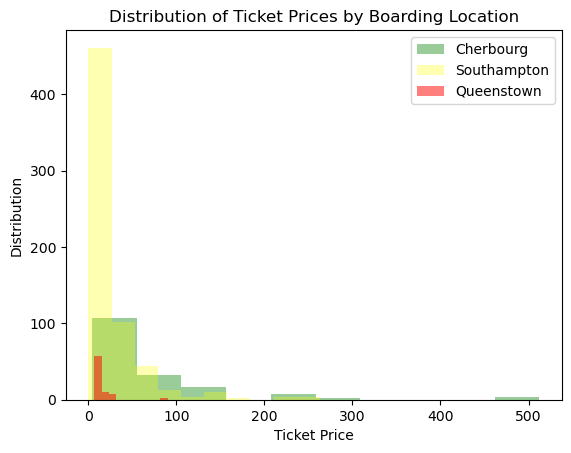

In [14]:
embarked_C = train[train['Embarked'] == 'C']['Fare']
embarked_S = train[train['Embarked'] == 'S']['Fare']
embarked_Q = train[train['Embarked'] == 'Q']['Fare']

plt.hist(embarked_C, alpha=0.4, color='green', label='Cherbourg')
plt.hist(embarked_S, alpha=0.3, color='yellow', label='Southampton')
plt.hist(embarked_Q, alpha=0.5, color='red', label='Queenstown')
plt.xlabel('Ticket Price')
plt.ylabel('Distribution')
plt.title('Distribution of Ticket Prices by Boarding Location')
plt.legend()
plt.show()

As we can see, the majority of passengers in the dataset embarked from Southampton (S). Passengers from Cherbourg (C) tend to have a higher proportion of high-priced tickets compared to passengers from other embarkation locations.

### 7

Do all the features provide useful information? Why? Get rid of unnecessary columns. Justify your choice.

In [15]:
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


I removed "PassengerId" column as it duplicates the Pandas DataFrame indices.

"Name", "Ticket", and "Cabin" columns were removed as they lack direct relevance to analysis tasks, unless one intends to apply Kabbalah's gematria or similar esoteric interpretations of texts and numbers to construct a conspiracy theory.

### 8

Are there any gaps in the data? If yes, in which columns? How many gaps are there in each of them?

In [16]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

As we can see there are 177 gaps in "Age" column, and 2 in "Embarked".

### 9

Think about how to fill in the gaps in each column and perform it. Check that there are no gaps left anywhere.

In [17]:
train = train.fillna({"Age": round(train["Age"].mean()),
                      "Embarked": train["Embarked"].mode()[0]})

In [18]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Strategies I used to fill in the gaps in the columns:

1. **Age**: One approach is to fill the missing values with the mean age of passengers rounded to integer.
2. **Embarked**: There are only 2 missing values in the "Embarked" column, they can be replaced with the most common value of the "Embarked" column.

### 10

Calculate how strongly the price of a ticket and the age of passengers correlate with each other. Also check the presence of this connection visually (building a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) will help you with this). What conclusions can be drawn?

In [19]:
train['Age'].corr(train['Fare'])

0.09063187236620253

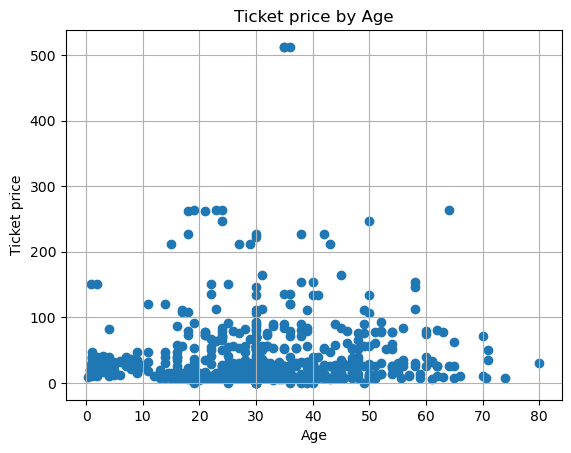

In [20]:
plt.scatter(train['Age'], train['Fare'])
plt.xlabel('Age')
plt.ylabel('Ticket price')
plt.title('Ticket price by Age')
plt.grid(True)
plt.show()

As we can see there's little connection between how much someone paid for their ticket and how old they are. The distribution of ticket prices remains consistent across different ages.

### 11

Is it true that passengers with more expensive tickets survived more often? Is there a dependence of survival on class? Give reasons for your answer!

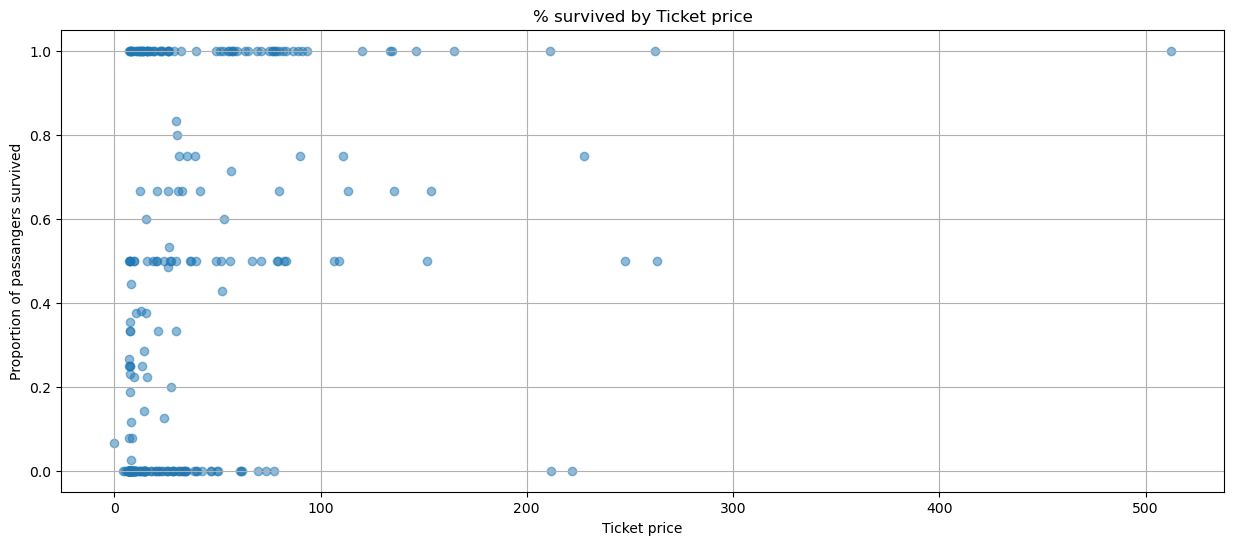

In [21]:
survival_proportion = train.groupby('Fare')['Survived'].mean()
plt.figure(figsize=(15, 6))
plt.scatter(survival_proportion.index, survival_proportion.values, alpha=0.5)
plt.xlabel('Ticket price')
plt.ylabel('Proportion of passangers survived')
plt.title('% survived by Ticket price')
plt.grid(True)
plt.show()

As we can see as ticket prices increase, the proportion of passengers who survived also tends to increase.

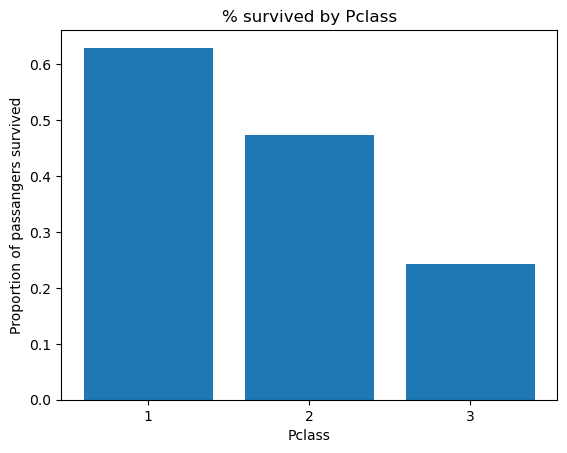

In [22]:
survival_proportion = train.groupby('Pclass')['Survived'].mean()
plt.bar(survival_proportion.index, survival_proportion.values)
plt.xticks([1, 2, 3])
plt.xlabel('Pclass')
plt.ylabel('Proportion of passangers survived')
plt.title('% survived by Pclass')
plt.show()

As we can see larger proportion of passengers in higher classes survived the disaster compared to passengers in lower classes, indicating that Pclass played a significant role in determining survival outcomes.

### 12

Creating new features (feature engineering) is one of the main means of improving the quality of machine learning algorithms at the data processing stage, and is also a great way to improve the quality of your conclusions from your analysis in general! Add a column to the table that will show how many relatives sailed with the passenger on the ship, including himself. How can such feature be useful?

In [23]:
train['Relatives'] = train['SibSp'] + train['Parch'] + 1
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,30.0,1,2,23.4500,S,4
889,1,1,male,26.0,0,0,30.0000,C,1


Possible application of this feature:
- It provides insights into the size of the passenger's family unit traveling together on the ship. This can be useful for understanding social dynamics and potential patterns related to survival rates among families.
- Family size may impact a passenger's likelihood of survival, so this feature can be useful in survival prediction.
- Family size can also affect other things like the class of ticket they had or how much they paid. For example, larger families might have chosen cheaper tickets, which could affect if they survived or not.

### 13

Now come up with your own feature that can be useful for analysis (carries some information), and add it to the table. Be sure to give reasons why your feature is useful.

In [24]:
borders = [train['Age'] < 18,
           (train['Age'] >= 18) & (train['Age'] < 60),
           train['Age'] >= 60]
ages = ['child', 'adult', 'senior']
train['Age group'] = np.select(borders, ages)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Age group
0,0,3,male,22.0,1,0,7.2500,S,2,adult
1,1,1,female,38.0,1,0,71.2833,C,2,adult
2,1,3,female,26.0,0,0,7.9250,S,1,adult
3,1,1,female,35.0,1,0,53.1000,S,2,adult
4,0,3,male,35.0,0,0,8.0500,S,1,adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,adult
887,1,1,female,19.0,0,0,30.0000,S,1,adult
888,0,3,female,30.0,1,2,23.4500,S,4,adult
889,1,1,male,26.0,0,0,30.0000,C,1,adult


In [25]:
train['Age group'].value_counts()

adult     752
child     113
senior     26
Name: Age group, dtype: int64

I suggest to add an "Age Group" feature. Grouping passengers into age categories (child, adult, senior) could reveal age-related patterns in survival rates, as well as provide with insights on age composition of passangers.

As we can see there were 113 children, 752 adults, and 26 seniors on the ship.

### 14

Come up with some interesting task to analyze the proposed data and solve it.

Creativity is appreciated in this task and may earn you 1-2 bonus points!

*Clue. For example, what was the most popular surname on the ship? (It’s better not to use this example, so come up with something of your own)*

Let us explore how many children survived the catastrophe.

In [26]:
children = train[train['Age group'] == "child"]
ch_survived_num = len(children[children['Survived'] == 1])
print("About ", round(ch_survived_num / len(children) * 100, 2), "% of the children survived the catastrophe.", sep='')

About 53.98% of the children survived the catastrophe.


As we know from task 4, about 38.38% of the total number of passengers survived the catastrophe, which is less than the survival rate of children. This suggests that children had a higher priority of rescue than adult and senior passengers.

### 15

Construct histograms of the distribution of **numerical** features. Is there any difference between them? How could this be bad from a data analytics perspective and from a machine learning perspective? Normalize the numerical features and see how the situation has changed. What conclusions can be drawn from this?

The depth of answering the theoretical questions in this assignment is appreciated and may earn you 1-2 bonus points!

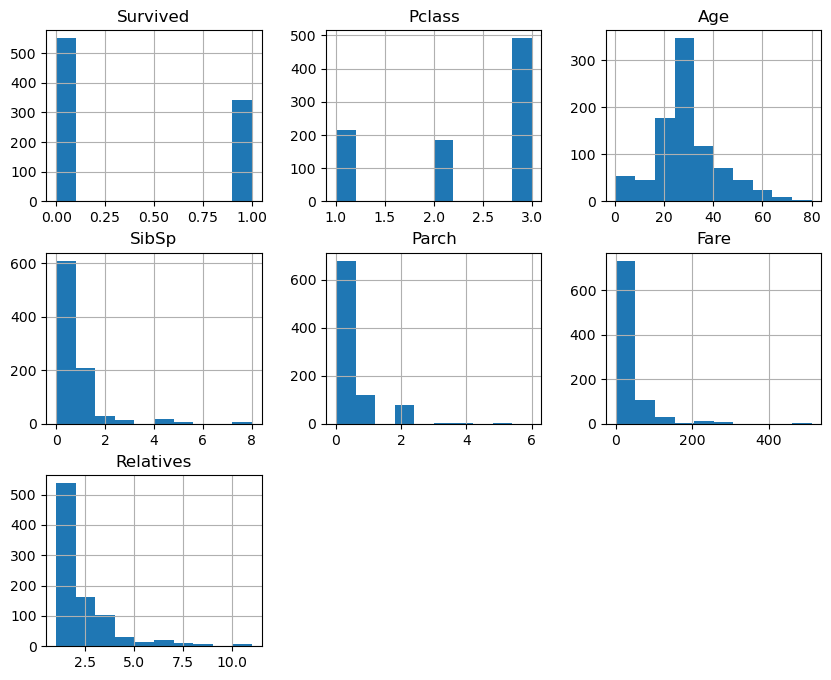

In [27]:
train.hist(figsize=(10, 8))
plt.show()

### 16

Are there any categorical features in the data that take string values ​​rather than numbers? If so, this could be a serious problem for many algorithms, so encode the categorical features so that any algorithm can be applied to the data.

In [28]:
train.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Relatives      int64
Age group     object
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
train['Age group'] = le.fit_transform(train['Age group'])
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Age group
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,0
887,1,1,0,19.0,0,0,30.0000,2,1,0
888,0,3,0,30.0,1,2,23.4500,2,4,0
889,1,1,1,26.0,0,0,30.0000,0,1,0


There are 3 categorical features that take string values rather than numbers: 'Sex', 'Embarked', and 'Age group'. I changed string values in 3 of these columns to numerical.

In [30]:
train.dtypes

Survived       int64
Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked       int64
Relatives      int64
Age group      int64
dtype: object

Now, all categorical features have numerical values.